1_1)DFT and IDFT using double summation

In [9]:
import cmath
import math
import numpy as np
import sympy

def DFT(Input_I):
  N,M=Input_I.shape
  WN_WM=np.zeros((N,M),complex)
  Img_DFT=np.zeros((N,M),complex)
  for u in range(N):
    for v in range(M):
      sum=0
      for i in range(N):
        for k in range(M):
         a=2*(sympy.pi)*(((u*i)/N)+((v*k)/M))
         WN_WM[u,v]=sympy.cos(a)-1j*sympy.sin(a)
         sum=sum+Input_I[i,k]*WN_WM[u,v]
      Img_DFT[u,v]=sum
  mag_DFT=np.zeros((N,M),float)
  ph_DFT=np.zeros((N,M),float)
  for i in range(N):
    for k in range(M):
      mag_DFT[i,k],ph_DFT[i,k]=cmath.polar(Img_DFT[i,k])    
  return Img_DFT,mag_DFT,ph_DFT

def IDFT(dft_I):
  N,M=dft_I.shape
  WN_WM=np.zeros((N,M),complex)
  Img_IDFT=np.zeros((N,M),complex)
  for i in range(N):
    for j in range(M):
      sum=0
      for u in range(N):
        for v in range(M):
         a=2*(math.pi)*(((-u*i)/N)+((-v*k)/M))
         WN_WM[i,k]=cmath.exp(-1j*a)
         sum=sum+dft_I[u,v]*WN_WM[i,k]
      Img_IDFT[i,k]=sum/(M*N)
  mag_IDFT=np.zeros((N,M),float)
  ph_IDFT=np.zeros((N,M),float)
  for i in range(N):
    for k in range(M):
      mag_IDFT[i,k],ph_IDFT[i,k]=cmath.polar(Img__IDFT[i,k])    
  return Img_IDFT,mag_IDFT,ph_IDFT



1_2)DFT and IDFT using Matrix mutiplication

In [10]:
import cmath
import math
import sympy
import numpy as np



def DFT_matrix(Input_I):
  N,M=Input_I.shape
  Img_DFT=np.zeros((N,M),complex)
  WN=np.zeros((N,M),complex)
  for u in range(N):
    for v in range(M):
      k=sympy.pi
      WN[u,v]=sympy.cos((2*k*u*v)/N)-1j*sympy.sin((2*k*u*v)/N)
  b=np.matmul(WN,Input_I)
  Img_DFT=np.matmul(b,WN)
  ph_DFT=np.zeros((N,M),float)
  mag_DFT=np.zeros((N,M),float)
  for i in range(N):
    for k in range(M):
      mag_DFT[i,k],ph_DFT[i,k]=cmath.polar(Img_DFT[i,k])
  return Img_DFT,mag_DFT,ph_DFT

def IDFT_matrix(Inp_I):
  N,M=Inp_I.shape
  Img_IDFT=np.zeros((N,M),complex)
  WN_con=np.zeros((N,M),complex)
  for u in range(N):
    for v in range(M):
      k=sympy.pi
      WN_con[u,v]=sympy.cos((2*k*u*v)/N)+1j*sympy.sin((2*k*u*v)/N)
  x=np.matmul(WN_con,Inp_I)
  Img_IDFT=(np.matmul(x,WN_con))/(M*N)
  ph_IDFT=np.zeros((N,M),float)
  mag_IDFT=np.zeros((N,M),float)
  for i in range(N):
    for k in range(M):
      mag_IDFT[i,k],ph_IDFT[i,k]=cmath.polar(Img_IDFT[i,k])
  return Img_IDFT,mag_IDFT,ph_IDFT




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
files.upload()
files.upload()
files.upload()

1_1)Display of the image, its DFT magnitude, phase, DFT magnitude subject to the logarithmic transformation.

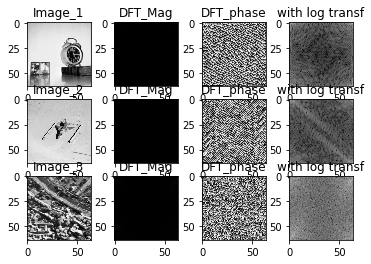

In [15]:
import matplotlib.pyplot as plt
import cv2
def mag_log_trns(magn_I):
  J1=np.zeros(magn_I.shape)
  J2=np.zeros(magn_I.shape)
  J1=np.log(magn_I+1)
  A=np.amin(J1)
  B=np.amax(J1)
  K=256
  P=((K-1)/(B-A))
  L=(-1)*A*P
  J2=P*J1+L
  return J2

I1=plt.imread('5.1.12 (2).tiff')   #enter image1 name as uploaded
I1=cv2.resize(I1,(64,64))
DFT_I1,m1,p1=DFT_matrix(I1)
magn_log_1=mag_log_trns(m1)
plt.subplot(3, 4, 1)
plt.title('Image_1')
plt.imshow(I1,cmap='gray')
plt.subplot(3, 4, 2)
plt.title('DFT_Mag')
plt.imshow(m1,cmap='gray')
plt.subplot(3, 4, 3)
plt.title('DFT_phase')
plt.imshow(p1,cmap='gray')
plt.subplot(3, 4, 4)
plt.title('with log transf')
plt.imshow(magn_log_1,cmap='gray')


I2=plt.imread('Airplane.tiff')       #enter image2 name as uploaded
I2=cv2.resize(I2,(64,64))
DFT_I2,m2,p2=DFT_matrix(I2)
magn_log_2=mag_log_trns(m2)
plt.subplot(3, 4, 5)
plt.title('Image_2')
plt.imshow(I2,cmap='gray')
plt.subplot(3, 4, 6)
plt.title('DFT_Mag')
plt.imshow(m2,cmap='gray')
plt.subplot(3, 4, 7)
plt.title('DFT_phase')
plt.imshow(p2,cmap='gray')
plt.subplot(3, 4, 8)
plt.title('with log transf')
plt.imshow(magn_log_2,cmap='gray')

I3=plt.imread('5.1.10.tiff')          #enter image3 name as uploaded
I3=cv2.resize(I3,(64,64))
DFT_I3,m3,p3=DFT_matrix(I3)
magn_log_3=mag_log_trns(m3)
plt.subplot(3, 4, 9)
plt.title('Image_3')
plt.imshow(I3,cmap='gray')
plt.subplot(3, 4, 10)
plt.title('DFT_Mag')
plt.imshow(m3,cmap='gray')
plt.subplot(3, 4, 11)
plt.title('DFT_phase')
plt.imshow(p3,cmap='gray')
plt.subplot(3, 4, 12)
plt.title('with log transf')
plt.imshow(magn_log_3,cmap='gray')



1_2)Display of centered DFT magnitude

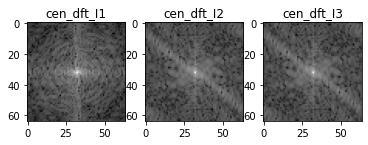

In [16]:
import numpy as np


def cen_dft_mag(image):
  N,M=image.shape
  I_c=np.zeros((N,M),complex)
  for i in range(N):
    for k in range(M):
      g=(-1)**(i+k)
      I_c[i,k]=g*image[i,k]
  cen_dft,cen_dft_mag,cen_dft_ph=DFT_matrix(I_c)
  magn_log_cen_dft=mag_log_trns(cen_dft_mag)
  return magn_log_cen_dft
cen_dft_I1=cen_dft_mag(I1)
plt.subplot(1, 3, 1)
plt.title('cen_dft_I1')
plt.imshow(cen_dft_I1,cmap='gray')
cen_dft_I2=cen_dft_mag(I2)
plt.subplot(1, 3, 2)
plt.title('cen_dft_I2')
plt.imshow(cen_dft_I2,cmap='gray')
cen_dft_I3=cen_dft_mag(I2)
plt.subplot(1, 3, 3)
plt.title('cen_dft_I3')
plt.imshow(cen_dft_I3,cmap='gray')



1_3)verification of IDFT[DFT[I]]

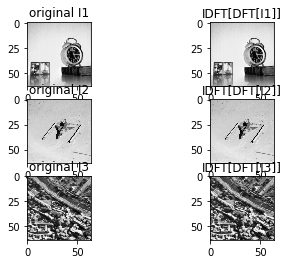

In [17]:
DFT_I1,m1,p1=DFT_matrix(I1)
IDFT_I1,Im1,Ip1=IDFT_matrix(DFT_I1)
plt.subplot(3, 2, 1)
plt.title('original I1')
plt.imshow(I1,cmap='gray')
plt.subplot(3, 2, 2)
plt.title('IDFT[DFT[I1]]')
plt.imshow(IDFT_I1.real,cmap='gray')

DFT_I2,m2,p2=DFT_matrix(I2)
IDFT_I2,Im2,Ip2=IDFT_matrix(DFT_I2)
plt.subplot(3, 2, 3)
plt.title('original I2')
plt.imshow(I2,cmap='gray')
plt.subplot(3, 2, 4)
plt.title('IDFT[DFT[I2]]')
plt.imshow(IDFT_I2.real,cmap='gray')

DFT_I3,m3,p3=DFT_matrix(I3)
IDFT_I3,Im3,Ip3=IDFT_matrix(DFT_I3)
plt.subplot(3, 2, 5)
plt.title('original I3')
plt.imshow(I3,cmap='gray')
plt.subplot(3, 2, 6)
plt.title('IDFT[DFT[I3]]')
plt.imshow(IDFT_I3.real,cmap='gray')



1_4)To show the importance of phase by transposing the phase matrix,setting the phase to 0,by adding noise.

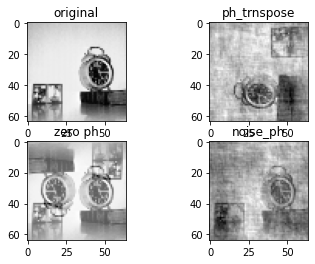

In [18]:
import cv2
import matplotlib.pyplot as plt


def ph_importance(I):
  DFT_I,m,p=DFT_matrix(I)
  p_trsp=p.transpose()
  N,M=I.shape
  p_tr_IDFT=np.zeros(I.shape,complex)
  z_p_IDFT=np.zeros(I.shape,complex)
  Nw_DFT1=np.zeros(I.shape,complex)
  Nw_DFT2=np.zeros(I.shape,complex)
  realm=np.zeros(I.shape,float)

  for i in range(N):
    for k in range(M):
      Nw_DFT1[i,k]=cmath.rect(m[i,k],p_trsp[i,k])
  p_tr_IDFT,magp,php=IDFT_matrix(Nw_DFT1)   #synthesizing the image with transposed phase
  z_p_IDFT,magz,phz=IDFT_matrix(DFT_I.real) #synthesizing the image with zero phase
  noise_ph_IDFT=np.zeros(I.shape,complex) 
  for i in range(N):
    for k in range(M):
      realm[i,k]=(p_tr_IDFT[i,k].real)
  N2=np.random.normal(0,1,size=p.shape)
  noise_ph=p+N2
  for i in range(N):
    for k in range(M):
      Nw_DFT2[i,k]=cmath.rect(m[i,k],noise_ph[i,k])
  noise_ph_IDFT,nmg,nph=IDFT_matrix(Nw_DFT2)   #synthesizing the image with noise added phase
  plt.subplot(2,2,1)
  plt.title('original')
  plt.imshow(I,cmap='gray') 
  plt.subplot(2,2,2)
  plt.title('ph_trnspose')
  plt.imshow(realm,cmap='gray')
  plt.subplot(2,2,3)
  plt.title('zero ph')
  plt.imshow(z_p_IDFT.real,cmap='gray')
  plt.subplot(2, 2, 4)
  plt.title('noise_ph')
  plt.imshow(noise_ph_IDFT.real,cmap='gray')
I1=cv2.resize(I1,(64,64))
ph_importance(I1)


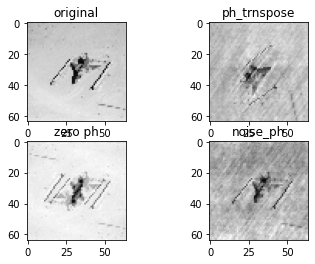

In [19]:
I2=cv2.resize(I2,(64,64))
ph_importance(I2)

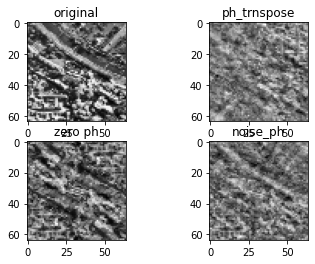

In [20]:
import cv2
I3=cv2.resize(I3,(64,64))
ph_importance(I3)

2_1)Circular convolution

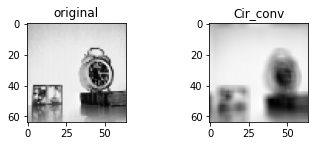

In [33]:
import cmath
import math
import numpy as np
import sympy


avg_fil=np.ones((5,5),int)
H=np.zeros(I1.shape,int)
for m in range(5):
  for l in range(5):
     H[m,l]=avg_fil[m,l]
#circular convolution
def cir_con(Input_I,H):
  N,M=Input_I.shape
  cir=np.zeros((N,M),float)
  for i in range(N):
    for k in range(M):
      sum=0
      for p in range(N):
        for q in range(M):
         a=np.mod((i-p),N)
         b=np.mod((k-q),M)
         sum=sum+Input_I[a,b]*H[p,q]
      cir[i,k]=sum  
  plt.subplot(2,2,1)
  plt.title('original')
  plt.imshow(Input_I,cmap='gray') 
  plt.subplot(2,2,2)
  plt.title('Cir_conv')
  plt.imshow(cir,cmap='gray')  
  return cir
ax=cir_con(I1,H)


2_2) Linearl convolution using the circular convolution function above after appropriate zero padding.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


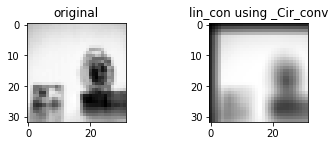

In [45]:
import cv2
import matplotlib.pyplot as plt

I1=cv2.resize(I1,(32,32))
N,M=I1.shape
S=np.zeros((2*N,2*M),int)
H=np.zeros(S.shape,int)
fil=np.ones((5,5),int)
for i in range(N):
  for j in range(M):
     S[i,j]=I1[i,j]
    
for i in range(5):
  for j in range(5):
    H[i,j]=fil[i,j] 

dx=cir_con(S,H) 
J=np.zeros(I1.shape,float)
for i in range(0,N):
  for k in range(0,M):
    J[i,k]=dx[i,k]
plt.subplot(2,2,1)
plt.title('original')
plt.imshow(I1,cmap='gray') 
plt.subplot(2,2,2)
plt.title('lin_con using _Cir_conv')
plt.imshow(J,cmap='gray')

2_3)linear covolution using the DFT of zero padded images.

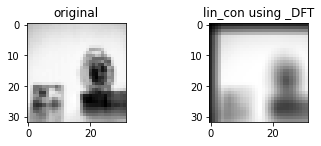

In [47]:

import cv2
I1=cv2.resize(I1,(32,32))
N,M=I1.shape

S=np.zeros((2*N,2*M),int)
for i in range(N):
  for j in range(M):
     S[i,j]=I1[i,j]
H=np.zeros(S.shape,int)
fil=np.ones((5,5),int)
for i in range(5):
  for j in range(5):
     H[i,j]=fil[i,j]

dft1,m11,p11=DFT_matrix(S)
dft2,m12,p12=DFT_matrix(H)
s1=dft1*dft2
idft2,im12,ip12=IDFT_matrix(s1)
J22=np.zeros(I1.shape,float)
for i in range(0,N):
  for k in range(0,M):
    J22[i,k]=idft2.real[i,k]
plt.subplot(2,2,1)
plt.title('original')
plt.imshow(I1,cmap='gray') 
plt.subplot(2,2,2)
plt.title('lin_con using _DFT')
plt.imshow(J22,cmap='gray')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
files.upload()
files.upload()
files.upload()

3_1)Denoising using Average Filter

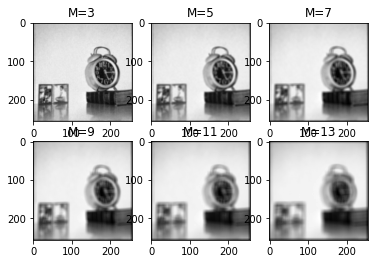

In [24]:
import matplotlib.pyplot as plt
import numpy as np
I1=plt.imread('5.1.12 (3).tiff')     #enter image1 name as uploaded
N1=np.random.normal(0,5,size=I1.shape)
J1=I1+N1

I2=plt.imread('Airplane (1).tiff')    #enter image2 name as uploaded
N2=np.random.normal(0,5,size=I2.shape)
J2=I2+N2

I3=plt.imread('APC (2).tiff')         #enter image3 name as uploaded
N3=np.random.normal(0,5,size=I3.shape)
J3=I3+N3

def resize_img(img,M):
  s=img.shape
  row=s[0]+M-1
  col=s[1]+M-1
  a1=((M-1)/2)
  a2=((M-1)/2)
  N=np.zeros((row,col),int)
  for i in range(s[0]):
     for j in range(s[1]):
       N[i+np.int(a1),j+np.int(a2)]=img[i,j]
  return N
def avg_filter(I):
  for M in range(3,15,2):
    H=np.ones((M,M),int)/(M*M)
    NJ=resize_img(I,M)
    s=NJ.shape
    K=np.zeros(I.shape,int)
    for i in range(0,s[0]-M+1):
      for j in range(0,s[1]-M+1):
        a=NJ[i:i+M,j:j+M]
        res=a*H
        K[i,j]=np.sum(res) 
    plt.subplot(2,3,np.int((M-1)/2))
    plt.title('M='+ str(M))
    plt.imshow(K,cmap='gray')

avg_filter(J1)


An appropriate window size for this noise level could be 3x3 or 5x5

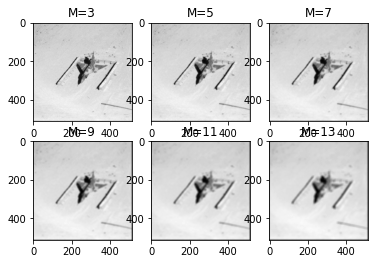

In [25]:
avg_filter(J2)


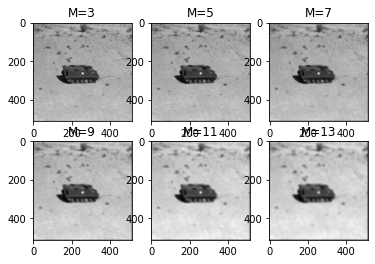

In [26]:
avg_filter(J3)

3_2)Denoising using Gaussian Filter

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: ComplexWarning: Casting complex values to real discards the imaginary part


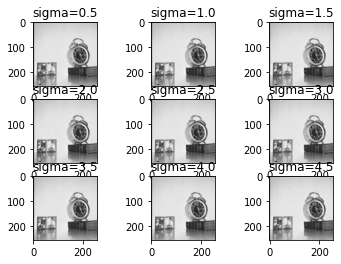

In [28]:
import math
import sympy
import numpy as np

def Dn_Gaus_filter(I):
  p=sympy.pi
  sigma=0.5
  H_Tilde=np.zeros((5,5),float)
  while (sigma<5):
    for u in range(5):
      for v in range(5):
        N=len(I)
        p=math.pi
        a=2*((p*sigma)**2)/(N*N)
        b=((u**2)+(v**2))
        c=a*b
        H_Tilde[u,v]=(math.exp(-c))
    M=5
    NJ=resize_img(I,M)
    s=NJ.shape
    K=np.zeros(I.shape,int)
    H,m,p=IDFT_matrix(H_Tilde)
    for i in range(0,s[0]-M+1):
      for j in range(0,s[1]-M+1):
        Im=NJ[i:i+M,j:j+M]
        res=Im*H
        K[i,j]=np.sum(res)  
    plt.subplot(3,3,np.int(sigma*2))
    plt.title('sigma='+ str(sigma))
    plt.imshow(K,cmap='gray') 
    sigma=sigma+0.5


Dn_Gaus_filter(J1)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: ComplexWarning: Casting complex values to real discards the imaginary part


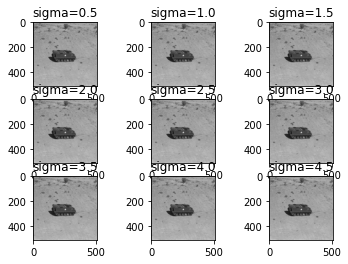

In [ ]:

Dn_Gaus_filter(J2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: ComplexWarning: Casting complex values to real discards the imaginary part


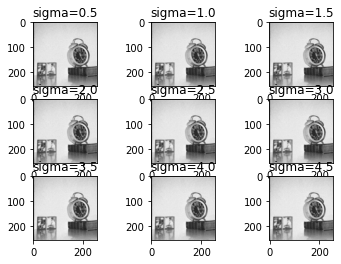

In [ ]:

Dn_Gaus_filter(J3)